# **Final Project - Poverty Prediction Challenge**

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
X = pd.read_csv("train_hh_features.csv")
print("Shape:", X.shape)
print("The columns are:", X.shape[1])

Shape: (104234, 88)
The columns are: 88


In [ ]:
display(X.head(3))

dup_rows = X.duplicated().sum()
print("The duplicate rows are:", dup_rows)

,hhid,com,weight,strata,utl_exp_ppp17,male,hsize,num_children5,num_children10,num_children18,...,consumed4200,consumed4300,consumed4400,consumed4500,consumed4600,consumed4700,consumed4800,consumed4900,consumed5000,survey_id
0,100001,1,75,4,594.80627,Female,1,0,0,0,...,Yes,No,No,No,Yes,Yes,Yes,Yes,No,100000
1,100002,1,150,4,1676.27230,Female,2,0,0,0,...,Yes,No,No,No,No,Yes,Yes,No,No,100000
2,100003,1,375,4,506.93719,Male,5,0,0,2,...,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Yes,100000


The duplicate rows are: 0


In [ ]:
print("dtypes count:")
print(X.dtypes.value_counts())

dtypes count:
object     64
int64      20
float64     4
Name: count, dtype: int64


In [ ]:
print("hhid nulls are:", X["hhid"].isna().sum())
print("hhid unique are:", X["hhid"].nunique(), " / rows:", len(X))

hhid nulls are: 0
hhid unique are: 104234  / rows: 104234


In [ ]:
missing_frac = X.isna().mean().sort_values(ascending=False)
missing_cnt = X.isna().sum().loc[missing_frac.index]
missing_tbl = pd.DataFrame({"missing_frac": missing_frac, "missing_cnt": missing_cnt, "dtype": X.dtypes.loc[missing_frac.index].astype(str)})
display(missing_tbl.head(25))

,missing_frac,missing_cnt,dtype
sector1d,0.135551,14129,object
dweltyp,0.011570,1206,object
utl_exp_ppp17,0.000815,85,float64
consumed5000,0.000633,66,object
consumed4900,0.000537,56,object
consumed4800,0.000537,56,object
consumed4600,0.000537,56,object
consumed4500,0.000518,54,object
consumed4300,0.000499,52,object
consumed4700,0.000499,52,object


In [ ]:
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X.select_dtypes(include=["number"]).columns.tolist()
print("Categorical columns are:", len(cat_cols))
print("Numeric columns are:", len(num_cols))

Categorical columns are: 64
Numeric columns are: 24


In [ ]:
if cat_cols:
    nunique_cat = X[cat_cols].nunique().sort_values(ascending=False)
    display(nunique_cat.head(20))

,0
sector1d,16
water_source,8
educ_max,7
sanitation_source,6
dweltyp,5
toilet,2
male,2
owner,2
sewer,2
elect,2


In [ ]:
nunique_num = X[num_cols].nunique().sort_values()
coded_like = nunique_num[nunique_num.between(2, 20)]
display(coded_like.head(30))

,0
region7,2
region6,2
region5,2
region4,2
region3,2
region2,2
region1,2
survey_id,3
num_elderly,5
num_children5,6


In [ ]:
for c in ["water", "water_source", "electricity", "toilet", "roof", "wall", "floor"]:
    if c in X.columns:
        print("\n", c)
        display(X[c].value_counts(dropna=False).head(15))


 water


,count
water,
Access,85296
No access,18938



 water_source


,count
water_source,
Piped water into dwelling,81514
Surface water,7619
Other,4180
Piped water to yard/plot,3782
Protected dug well,2641
Public tap or standpipe,1832
Tanker-truck,1539
Protected spring,1127



 toilet


,count
toilet,
Access,73274
No access,30960


In [ ]:
X.to_csv("train_hh_features_clean.csv", index=False)
print("Saved train_hh_features_clean.csv")

Saved train_hh_features_clean.csv


**Conclusion from the above:**

No duplicate entries

The hhid is clean and unique

Many categories (64) as expected

Few missing values (mainly in categories)

Values "Access" and "No access" are normal categories and not errors.

Regarding the next file "train_hh_gt.csv"

In [ ]:
y = pd.read_csv("train_hh_gt.csv")

In [ ]:
print("Shape:", y.shape)
print("The columns are:", list(y.columns))
display(y.head(3))

Shape: (104234, 3)
The columns are: ['survey_id', 'hhid', 'cons_ppp17']


,survey_id,hhid,cons_ppp17
0,100000,100001,25.258402
1,100000,100002,16.996706
2,100000,100003,13.671848


In [ ]:
print("hhid nulls are:", y["hhid"].isna().sum())
print("hhid unique are:", y["hhid"].nunique(), "/", len(y))

hhid nulls are: 0
hhid unique are: 104234 / 104234


In [ ]:
print("cons_ppp17 nulls are:", y["cons_ppp17"].isna().sum())

cons_ppp17 nulls are: 0


In [ ]:
print("unique survey_id:", y["survey_id"].nunique())
print("survey_id values:", sorted(y["survey_id"].unique()))

unique survey_id: 3
survey_id values: [np.int64(100000), np.int64(200000), np.int64(300000)]


In [ ]:
display(y["cons_ppp17"].describe())

,cons_ppp17
count,104234.000000
mean,11.555229
std,10.034225
min,0.359563
25%,5.439294
50%,8.774002
75%,14.216931
max,236.115680


**Conclusion for the above:**

1–1 matching with features: Each hhid appears exactly once in the labels. This means that the merge will later be clean, with no losses or duplicates.

No missing values in the target: cons_ppp17 is complete. Therefore, we do not need to remove rows or perform imputation in the target, which is very important for stable training.

Three surveys: The survey_id (100k, 200k, 300k) indicate that the data comes from different time/sample surveys. This means that proper performance testing must be done with a split per survey, not randomly.

Target distribution: cons_ppp17 is right-skewed (a few very large values). This is expected in consumption data and explains why models such as boosting work well and why log-transform may be considered later.

Regarding the third file "train_rates_gt.csv"

In [ ]:
rates = pd.read_csv("train_rates_gt.csv")

In [ ]:
print("Shape:", rates.shape)
print("The columns are:", list(rates.columns))
display(rates.head())

Shape: (3, 20)
The columns are: ['survey_id', 'pct_hh_below_3.17', 'pct_hh_below_3.94', 'pct_hh_below_4.60', 'pct_hh_below_5.26', 'pct_hh_below_5.88', 'pct_hh_below_6.47', 'pct_hh_below_7.06', 'pct_hh_below_7.70', 'pct_hh_below_8.40', 'pct_hh_below_9.13', 'pct_hh_below_9.87', 'pct_hh_below_10.70', 'pct_hh_below_11.62', 'pct_hh_below_12.69', 'pct_hh_below_14.03', 'pct_hh_below_15.64', 'pct_hh_below_17.76', 'pct_hh_below_20.99', 'pct_hh_below_27.37']


,survey_id,pct_hh_below_3.17,pct_hh_below_3.94,pct_hh_below_4.60,pct_hh_below_5.26,pct_hh_below_5.88,pct_hh_below_6.47,pct_hh_below_7.06,pct_hh_below_7.70,pct_hh_below_8.40,pct_hh_below_9.13,pct_hh_below_9.87,pct_hh_below_10.70,pct_hh_below_11.62,pct_hh_below_12.69,pct_hh_below_14.03,pct_hh_below_15.64,pct_hh_below_17.76,pct_hh_below_20.99,pct_hh_below_27.37
0,100000,0.067364,0.118927,0.169905,0.221865,0.271564,0.319585,0.366329,0.419816,0.471454,0.523798,0.574413,0.623091,0.671263,0.721329,0.773303,0.819770,0.865121,0.909075,0.954239
1,200000,0.059326,0.111560,0.159023,0.211754,0.263100,0.311758,0.356914,0.407631,0.463443,0.512931,0.559361,0.609337,0.659291,0.708043,0.760932,0.809045,0.860350,0.906385,0.952805
2,300000,0.049803,0.100381,0.149502,0.200144,0.250192,0.300211,0.349596,0.399930,0.449845,0.499930,0.550082,0.599926,0.650088,0.699617,0.750341,0.800111,0.850081,0.899974,0.949988


In [ ]:
print("survey_id unique:", rates["survey_id"].nunique(), sorted(rates["survey_id"].unique()))

survey_id unique: 3 [np.int64(100000), np.int64(200000), np.int64(300000)]


**Conclusion from the above:**

This file contains the poverty rates for each survey, with one row per survey and different consumption thresholds. For each threshold, the percentage of the population below it is shown. It can be observed that as the consumption threshold increases, so does the poverty rate, which is to be expected. The rates differ between surveys, indicating that the consumption level is not the same in all surveys. This file is used to evaluate the results and will not be used to train the model.

**Merging features**

In [ ]:
X = pd.read_csv("train_hh_features_clean.csv")
y = pd.read_csv("train_hh_gt.csv")[["hhid", "survey_id", "cons_ppp17"]]

df = X.merge(y, on="hhid", how="inner")
print(df.shape)
df.head()

(104234, 90)


,hhid,com,weight,strata,utl_exp_ppp17,male,hsize,num_children5,num_children10,num_children18,...,consumed4400,consumed4500,consumed4600,consumed4700,consumed4800,consumed4900,consumed5000,survey_id_x,survey_id_y,cons_ppp17
0,100001,1,75,4,594.80627,Female,1,0,0,0,...,No,No,Yes,Yes,Yes,Yes,No,100000,100000,25.258402
1,100002,1,150,4,1676.27230,Female,2,0,0,0,...,No,No,No,Yes,Yes,No,No,100000,100000,16.996706
2,100003,1,375,4,506.93719,Male,5,0,0,2,...,No,Yes,Yes,Yes,Yes,No,Yes,100000,100000,13.671848
3,100004,1,375,4,824.61786,Male,5,0,0,1,...,No,No,No,Yes,Yes,No,No,100000,100000,7.189475
4,100005,1,525,4,351.47644,Male,7,1,0,0,...,No,Yes,No,Yes,Yes,Yes,No,100000,100000,12.308855


<Axes: >

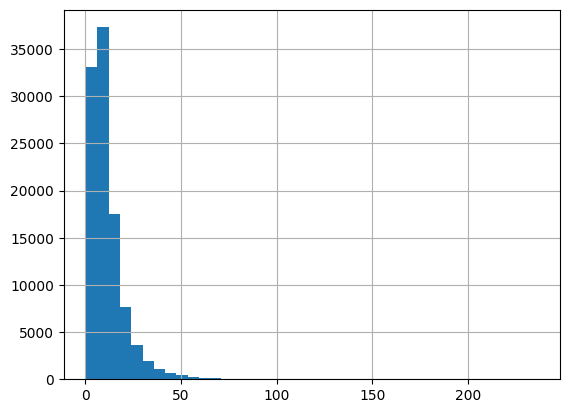

In [ ]:
df["cons_ppp17"].isna().sum()
df["cons_ppp17"].hist(bins=40)

In [ ]:
df = df.rename(columns={"survey_id_x": "survey_id"})
df = df.drop(columns=["survey_id_y"])

In [ ]:
if "survey_id_x" in df.columns:
    df = df.rename(columns={"survey_id_x": "survey_id"})

if "survey_id_y" in df.columns:
    df = df.drop(columns=["survey_id_y"])

In [ ]:
df.columns[df.columns.str.contains("survey_id")]

Index(['survey_id'], dtype='object')

In [ ]:
print(df.shape)
print(df.isna().sum().sum())

(104234, 89)
16409


In [ ]:
X.isna().sum().sum()

np.int64(16409)

In [ ]:
cat_cols = X.select_dtypes(include=["object", "category"]).columns
num_cols = X.select_dtypes(include=["int64", "float64"]).columns

print("categorical:", len(cat_cols))
print("numerical:", len(num_cols))

categorical: 64
numerical: 24


In [ ]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

X[num_cols] = num_imputer.fit_transform(X[num_cols])
X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])

In [ ]:
X.isna().sum().sum()

np.int64(0)

# **One-Hot Encoding**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(
    handle_unknown="ignore",
    sparse_output=False)

In [ ]:
X_cat = ohe.fit_transform(X[cat_cols])
print(X_cat.shape)

(104234, 160)


In [ ]:
import numpy as np

X_num = X[num_cols].values
X_final = np.hstack([X_num, X_cat])

print("X_num is:", X_num.shape)
print("X_cat is:", X_cat.shape)
print("X_final is:", X_final.shape)

X_num is: (104234, 24)
X_cat is: (104234, 160)
X_final is: (104234, 184)


In [ ]:
np.isnan(X_final).sum()

np.int64(0)

**Validating**

In [ ]:
survey_id = df["survey_id"].values

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np

surveys = np.unique(survey_id)
results = []

In [ ]:
for val_survey in surveys:
    train_mask = survey_id != val_survey
    val_mask = survey_id == val_survey

    X_train = X_final[train_mask]
    y_train = y[train_mask]

    X_val = X_final[val_mask]
    y_val = y[val_mask]

    model = LinearRegression(n_jobs=-1)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    mae = mean_absolute_error(y_val, y_pred)
    mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100

    results.append({
        "val_survey": int(val_survey),
        "MAE": mae,
        "MAPE in %": mape
    })

In [ ]:
import pandas as pd
results_df = pd.DataFrame(results)
results_df

,val_survey,MAE,MAPE in %
0,100000,1.369687,15.874105
1,200000,1.376214,15.109944
2,300000,1.370931,14.743742


From the above we conclude:

High MAPE (45–48%), the performance is stable but weak, but it is expected for a linear model in a nonlinear problem

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

rf_results = []

for val_survey in np.unique(survey_id):
    train_mask = survey_id != val_survey
    val_mask = survey_id == val_survey

    X_train = X_final[train_mask]
    y_train = y[train_mask]

    X_val = X_final[val_mask]
    y_val = y[val_mask]

    rf = RandomForestRegressor(
        n_estimators=200,
        max_depth=None,
        min_samples_leaf=5,
        n_jobs=-1,
        random_state=42
    )

    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)

    mae = mean_absolute_error(y_val, y_pred)
    mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100

    rf_results.append({
        "val_survey": int(val_survey),
        "MAE": mae,
        "MAPE (%)": mape
    })

In [ ]:
rf_results_df = pd.DataFrame(rf_results)
rf_results_df

,val_survey,MAE,MAPE (%)
0,100000,61306.359634,86.495259
1,200000,29463.852073,31.854944
2,300000,61389.922985,89.752485


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

y_vec = y["cons_ppp17"].values

gbr_results = []

for val_survey in np.unique(survey_id):
    train_mask = survey_id != val_survey
    val_mask = survey_id == val_survey

    X_train = X_final[train_mask]
    y_train = y_vec[train_mask]

    X_val = X_final[val_mask]
    y_val = y_vec[val_mask]

    gbr = GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    )

    gbr.fit(X_train, y_train)
    y_pred = gbr.predict(X_val)

    mae = mean_absolute_error(y_val, y_pred)
    mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100

    gbr_results.append({
        "val_survey": int(val_survey),
        "MAE": mae,
        "MAPE in %": mape
    })

In [ ]:
gbr_results_df = pd.DataFrame(gbr_results)
gbr_results_df

,val_survey,MAE,MAPE in %
0,100000,3.444923,35.882789
1,200000,3.452430,33.053465
2,300000,3.486817,33.336563


In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

def build_mlp(input_dim):
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss="mae"
    )
    return model

In [ ]:
mlp_results = []

y_vec = y["cons_ppp17"].values

for val_survey in np.unique(survey_id):
    train_mask = survey_id != val_survey
    val_mask = survey_id == val_survey

    X_train = X_final[train_mask]
    y_train = y_vec[train_mask]

    X_val = X_final[val_mask]
    y_val = y_vec[val_mask]

    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_val_s = scaler.transform(X_val)

    model = build_mlp(X_train_s.shape[1])

    early = keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=5,
        restore_best_weights=True
    )

    model.fit(
        X_train_s,
        y_train,
        validation_data=(X_val_s, y_val),
        epochs=50,
        batch_size=512,
        callbacks=[early],
        verbose=0
    )

    y_pred = model.predict(X_val_s, verbose=0).reshape(-1)

    mae = mean_absolute_error(y_val, y_pred)
    mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100

    mlp_results.append({
        "val_survey": int(val_survey),
        "MAE": mae,
        "MAPE in %": mape
    })

mlp_results_df = pd.DataFrame(mlp_results)
mlp_results_df

,val_survey,MAE,MAPE in %
0,100000,3.195057,29.132147
1,200000,3.266926,27.759647
2,300000,3.324050,28.067352


In [ ]:
import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

train_X = pd.read_csv("train_hh_features.csv")
train_y = pd.read_csv("train_hh_gt.csv")[["survey_id", "hhid", "cons_ppp17"]]
test_X  = pd.read_csv("test_hh_features.csv")

df_train = train_X.merge(train_y, on=["survey_id", "hhid"], how="inner")

train_ids = df_train[["survey_id", "hhid"]].copy()
test_ids  = test_X[["survey_id", "hhid"]].copy()

train_weights = df_train["weight"].values
test_weights  = test_X["weight"].values

y = df_train["cons_ppp17"].values

X_train = df_train.drop(columns=["cons_ppp17", "weight", "survey_id", "hhid"])
X_test  = test_X.drop(columns=["weight", "survey_id", "hhid"])

cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()

num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

X_train_num = num_imputer.fit_transform(X_train[num_cols])
X_test_num  = num_imputer.transform(X_test[num_cols])

X_train_cat = cat_imputer.fit_transform(X_train[cat_cols])
X_test_cat  = cat_imputer.transform(X_test[cat_cols])

ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

X_train_cat_ohe = ohe.fit_transform(X_train_cat)
X_test_cat_ohe  = ohe.transform(X_test_cat)

X_train_final = np.hstack([X_train_num, X_train_cat_ohe])
X_test_final  = np.hstack([X_test_num,  X_test_cat_ohe])

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train_final)
X_test_s  = scaler.transform(X_test_final)

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

def build_mlp(input_dim):
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(256, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss="mae")
    return model

model = build_mlp(X_train_s.shape[1])

early = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

model.fit(
    X_train_s,
    y,
    validation_split=0.1,
    epochs=60,
    batch_size=512,
    callbacks=[early],
    verbose=1
)

test_pred = model.predict(X_test_s, verbose=0).reshape(-1)
test_pred = np.clip(test_pred, 1e-6, None)

pred_hh = test_ids.copy()
pred_hh["per_capita_household_consumption"] = test_pred
pred_hh.to_csv("predicted_household_consumption.csv", index=False)

Epoch 1/60
184/184 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 5.5776 - val_loss: 3.2302
Epoch 2/60
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 3.5203 - val_loss: 3.1764
Epoch 3/60
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 3.4149 - val_loss: 3.1855
Epoch 4/60
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 3.3693 - val_loss: 3.2076
Epoch 5/60
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 3.3346 - val_loss: 3.2285
Epoch 6/60
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 3.3104 - val_loss: 3.2203
Epoch 7/60
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 3.2890 - val_loss: 3.2975


In [ ]:
thresholds = [3.17, 3.94, 4.60, 5.26, 5.88, 6.47, 7.06, 7.70, 8.40, 9.13,
              9.87, 10.70, 11.62, 12.69, 14.03, 15.64, 17.76, 20.99, 27.37]

poverty_rows = []

for sid in sorted(test_ids["survey_id"].unique()):
    mask = (test_ids["survey_id"].values == sid)
    w = test_weights[mask]
    c = test_pred[mask]
    w_total = w.sum()

    row = {"survey_id": int(sid)}
    for t in thresholds:
        row[f"pct_hh_below_{t:.2f}"] = (w[c < t].sum() / w_total) if w_total > 0 else 0.0

    poverty_rows.append(row)

pred_pov = pd.DataFrame(poverty_rows)
pred_pov.to_csv("predicted_poverty_distribution.csv", index=False)

pred_hh = pd.read_csv("predicted_household_consumption.csv")
pred_hh = pred_hh.rename(columns={"hhid": "household_id"})
pred_hh.to_csv("predicted_household_consumption.csv", index=False)

pred_hh = pd.read_csv("predicted_household_consumption.csv")

pred_hh = pred_hh.rename(columns={
    "hhid": "household_id",
    "per_capita_household_consumption": "cons_ppp17"
})
pred_hh.to_csv("predicted_household_consumption.csv", index=False)

import zipfile

with zipfile.ZipFile("submission.zip", "w", compression=zipfile.ZIP_DEFLATED) as z:
    z.write("predicted_household_consumption.csv")
    z.write("predicted_poverty_distribution.csv")

print("submission.zip ready")

submission.zip ready


In [ ]:
print("Linear:", results_df.columns)
print("RF:", rf_results_df.columns)
print("GBR:", gbr_results_df.columns)
print("MLP:", mlp_results_df.columns)

Linear: Index(['val_survey', 'MAE', 'MAPE in %'], dtype='object')
RF: Index(['val_survey', 'MAE', 'MAPE (%)'], dtype='object')
GBR: Index(['val_survey', 'MAE', 'MAPE in %'], dtype='object')
MLP: Index(['val_survey', 'MAE', 'MAPE in %'], dtype='object')


In [ ]:
results_df = results_df.rename(columns={"MAPE in %": "MAPE (%)"})
gbr_results_df = gbr_results_df.rename(columns={"MAPE in %": "MAPE (%)"})
mlp_results_df = mlp_results_df.rename(columns={"MAPE in %": "MAPE (%)"})

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

summary_df = pd.DataFrame([
    {"Model": "LinearRegression", "Mean MAE": results_df["MAE"].mean(), "Mean MAPE (%)": results_df["MAPE (%)"].mean()},
    {"Model": "RandomForest", "Mean MAE": rf_results_df["MAE"].mean(), "Mean MAPE (%)": rf_results_df["MAPE (%)"].mean()},
    {"Model": "GradientBoosting", "Mean MAE": gbr_results_df["MAE"].mean(), "Mean MAPE (%)": gbr_results_df["MAPE (%)"].mean()},
    {"Model": "MLP", "Mean MAE": mlp_results_df["MAE"].mean(), "Mean MAPE (%)": mlp_results_df["MAPE (%)"].mean()},
]).sort_values("Mean MAPE (%)")

summary_df

,Model,Mean MAE,Mean MAPE (%)
0,LinearRegression,1.372277,15.242597
3,MLP,3.262011,28.319716
2,GradientBoosting,3.461390,34.090939
1,RandomForest,50720.044897,69.367563


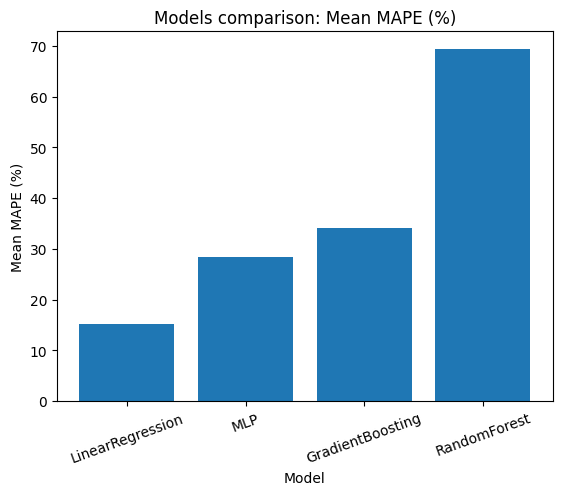

In [ ]:
plt.figure()
plt.bar(summary_df["Model"], summary_df["Mean MAPE (%)"])
plt.ylabel("Mean MAPE (%)")
plt.xlabel("Model")
plt.xticks(rotation=20)
plt.title("Models comparison: Mean MAPE (%)")
plt.show()